# Futures 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
future_contract = symbols('NGF18')

In [3]:
# Natural Gas 
future_contract.asset_name

'Natural Gas'

In [4]:
for key in future_contract.to_dict():
    print(key)
    print(future_contract.to_dict()[key])
    print('\n')

asset_name
Natural Gas


auto_close_date
2017-12-22 00:00:00+00:00


expiration_date
2017-12-27 00:00:00+00:00


start_date
2010-08-24 00:00:00+00:00


root_symbol
NG


exchange_full
NYMEX


tick_size
0.001


sid
1061201801


symbol
NGF18


multiplier
10000.0


end_date
2017-12-27 00:00:00+00:00


first_traded
None


exchange
NYMEX


exchange_info
ExchangeInfo('NYMEX', 'NYMEX', 'US')


notice_date
2017-12-28 00:00:00+00:00




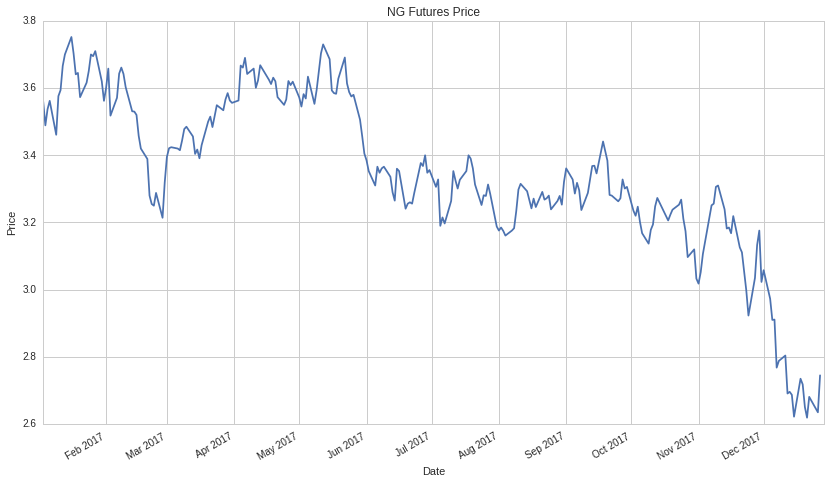

In [5]:
futures_position_value = get_pricing(future_contract, start_date = '2017-01-01', end_date = '2018-01-01', fields = 'price')
futures_position_value.name = futures_position_value.name.symbol
futures_position_value.plot()
plt.title('NG Futures Price')
plt.xlabel('Date')
plt.ylabel('Price');

## Historical Data 

In [16]:
from quantopian.research.experimental import history

In [17]:
print history.__doc__


    Load a table of historical trade data.

    Parameters
    ----------
    symbols : Asset-convertible object, ContinuousFuture, or iterable of same.
        Valid input types are Asset, Integral, basestring, or ContinuousFuture.
        In the case that the passed objects are strings, they are interpreted
        as ticker symbols and resolved relative to the date specified by
        symbol_reference_date.

    fields : str or list
        String or list drawn from {'price', 'open_price', 'high', 'low',
        'close_price', 'volume', 'contract'}.

    start : str or pd.Timestamp
        String or Timestamp representing a start date or start intraday minute
        for the returned data.

    end : str or pd.Timestamp
        String or Timestamp representing an end date or end intraday minute for
        the returned data.

    frequency : {'daily', 'minute'}
        Resolution of the data to be returned.

    symbol_reference_date : str or pd.Timestamp, optional
        String 

In [18]:
ngf18 = future_contract

In [20]:
ngf18_data = history(ngf18, 
                     fields=['price', 'open_price', 'high', 'low', 'close_price', 'volume', 'contract'], 
                     frequency='daily', 
                     start='2017-06-01', 
                     end='2017-08-01')

ngf18_data.head()

,price,open_price,high,low,close_price,volume,contract
2017-06-01 00:00:00+00:00,3.385,3.412,3.435,3.341,3.385,5497.0,Future(1061201801 [NGF18])
2017-06-02 00:00:00+00:00,3.353,3.386,3.386,3.336,3.353,2443.0,Future(1061201801 [NGF18])
2017-06-05 00:00:00+00:00,3.310,3.373,3.378,3.298,3.310,2457.0,Future(1061201801 [NGF18])
2017-06-06 00:00:00+00:00,3.366,3.318,3.371,3.307,3.366,2061.0,Future(1061201801 [NGF18])
2017-06-07 00:00:00+00:00,3.348,3.370,3.393,3.342,3.348,1834.0,Future(1061201801 [NGF18])


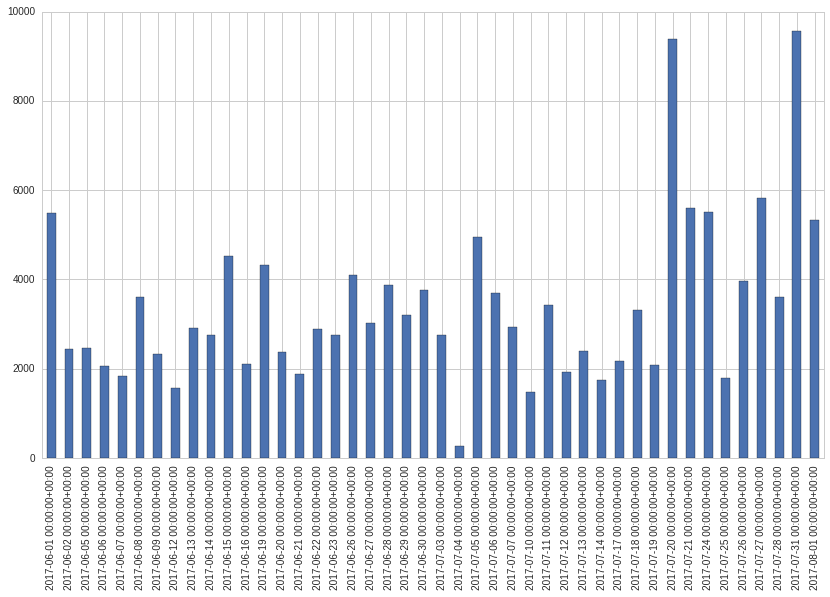

In [21]:
ngf18_data['volume'].plot(kind='bar')

## Comparison of different Maturity dates 

In [22]:
ng_contracts = symbols(['NGF17', 'NGG17', 'NGH17', 'NGJ17', 'NGK17', 'NGM17'])

In [24]:
ng_consecutive_contract_volume = history(ng_contracts, 
                                         fields='volume', 
                                         frequency='daily', 
                                         start='2016-01-01', 
                                         end='2017-08-01')

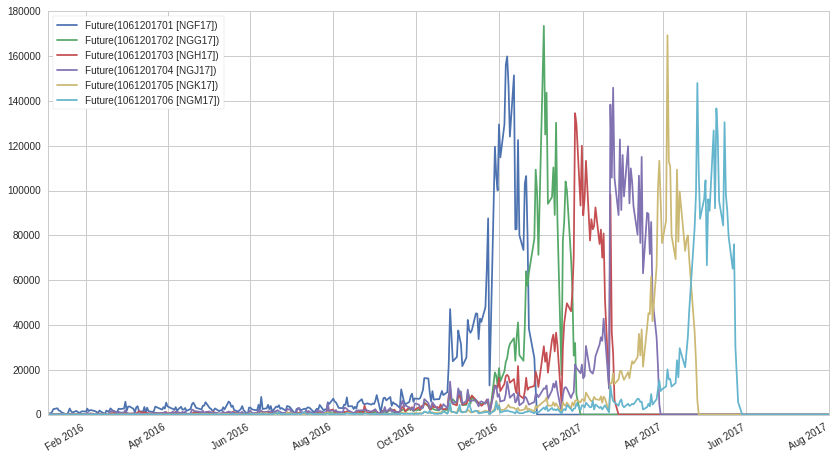

In [25]:
ng_consecutive_contract_volume.plot()

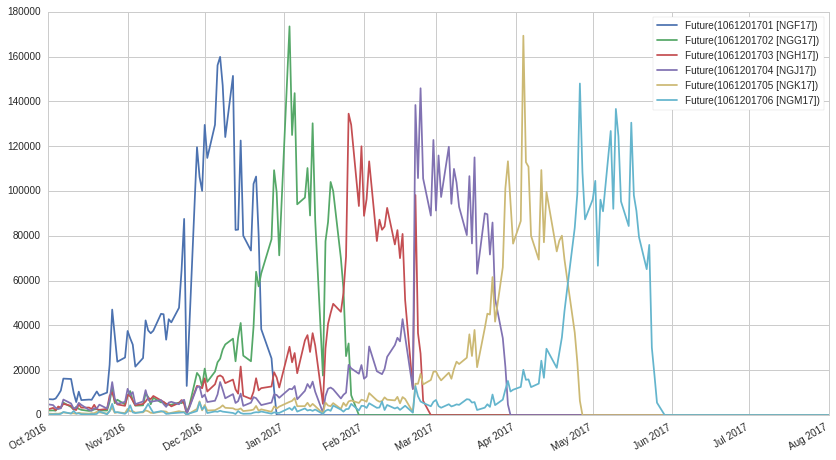

In [26]:
ng_consecutive_contract_volume.plot(xlim=['2016-10-01','2017-08-01'])

## Continuous Futures 

In [27]:
from quantopian.research.experimental import continuous_future

In [28]:
print(continuous_future.__doc__)


    Create a specifier for a continuous contract.

    Parameters
    ----------
    root_symbol : str
        The root symbol for the continuous future.

    offset : int, optional
        The distance from the primary contract. Default is 0.

    roll : str, optional
        How rolls are determined. Options are 'volume' and 'calendar'. Default
        is 'volume'.

    adjustment : str
        Method for adjusting lookback prices between rolls. Options are
        'mul', 'add', and None. Default is 'mul'.

    Returns
    -------
    continuous_future : ContinuousFuture
        The continuous future specifier.
    


In [29]:
continuous_ng = continuous_future('NG', offset=0, roll='volume', adjustment='mul')

In [30]:
continuous_ng

ContinuousFuture(94090707563773952, root_symbol='NG', offset=0, roll_style='volume', adjustment='mul')

In [31]:
ng_cont_active = history(continuous_ng, 
                    fields=['contract','price','volume'] ,
                    frequency='daily', 
                    start='2016-10-01', 
                    end='2017-08-01')

In [32]:
ng_cont_active.head()

,price,volume,contract
2016-10-03 00:00:00+00:00,3.960,86282.0,Future(1061201611 [NGX16])
2016-10-04 00:00:00+00:00,4.051,90845.0,Future(1061201611 [NGX16])
2016-10-05 00:00:00+00:00,4.133,119522.0,Future(1061201611 [NGX16])
2016-10-06 00:00:00+00:00,4.139,135372.0,Future(1061201611 [NGX16])
2016-10-07 00:00:00+00:00,4.321,159697.0,Future(1061201611 [NGX16])


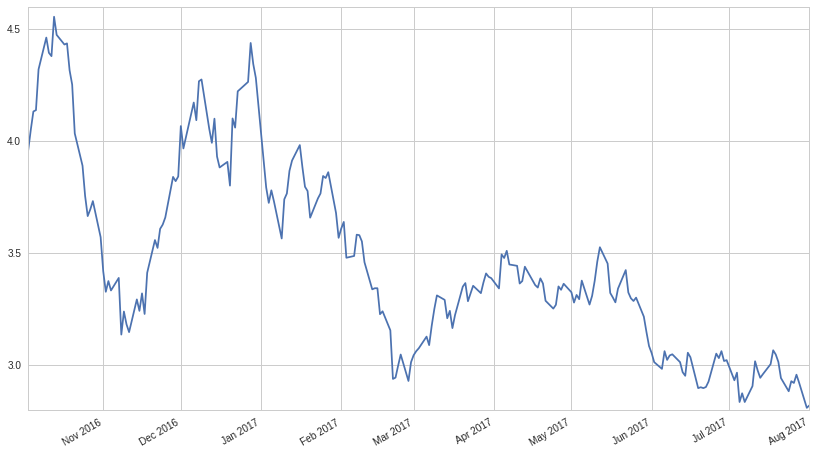

In [33]:
ng_cont_active['price'].plot()

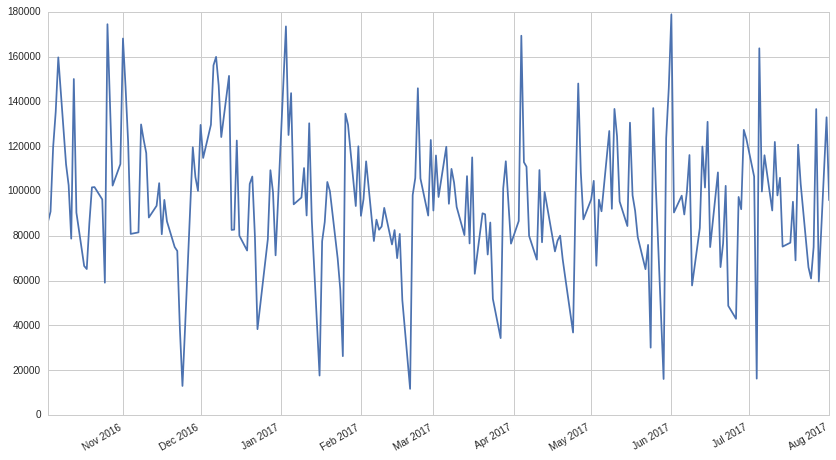

In [34]:
ng_cont_active['volume'].plot()

In [36]:
ng_consecutive_contract_volume = history(ng_contracts, 
                                         fields='volume', 
                                         frequency='daily', 
                                         start='2016-10-01', 
                                         end='2017-08-01')

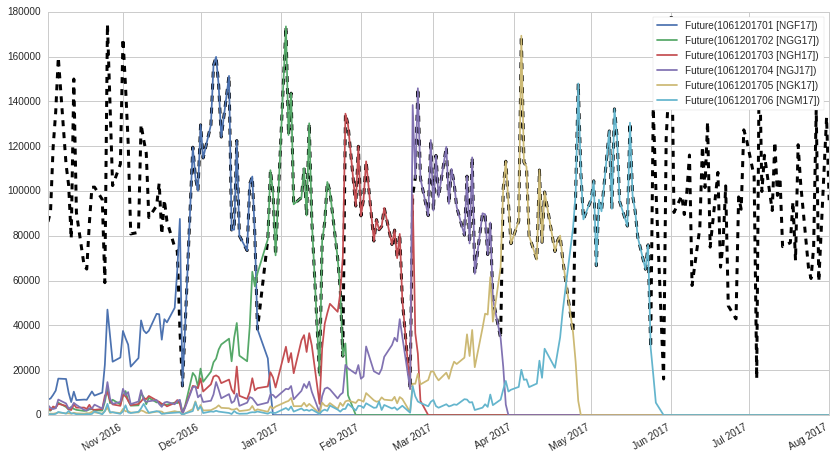

In [37]:
ax = ng_cont_active['volume'].plot(ls='--',c='black',lw=3)
ng_consecutive_contract_volume.plot(ax=ax)

In [38]:
ng_consecutive_contract_price = history(ng_contracts, 
                                         fields='price', 
                                         frequency='daily', 
                                         start='2016-10-01', 
                                         end='2017-08-01')

In [39]:
ng_continuous_active = history(continuous_ng, 
                    fields=['contract','price','volume'] ,
                    frequency='daily', 
                    start='2016-10-01', 
                    end='2017-08-01')

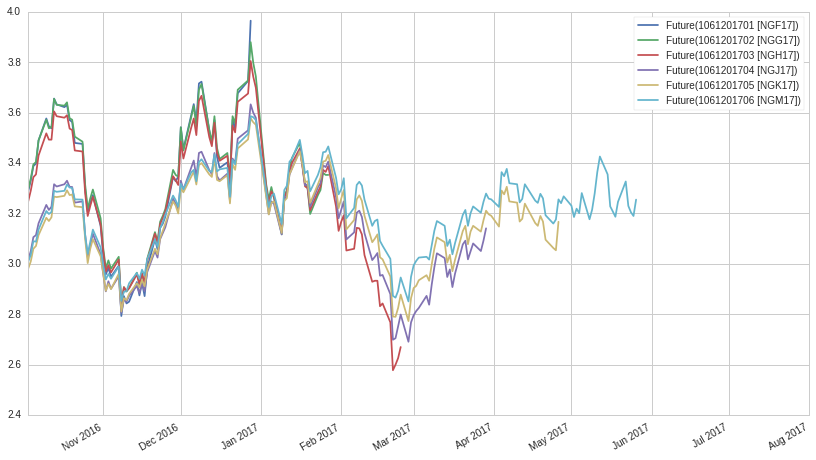

In [40]:
ng_consecutive_contract_price.plot()

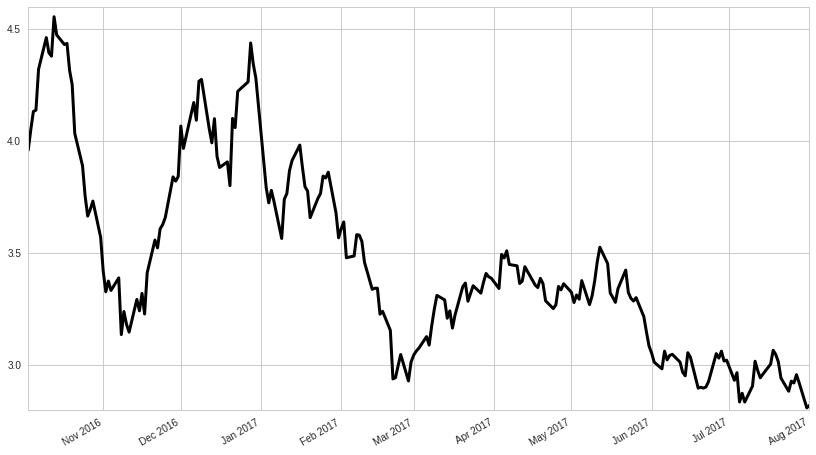

In [41]:
ng_cont_active['price'].plot(c='black',lw=3)

In [42]:
continuous_ng_unadjusted = continuous_future('NG', offset=0, roll='volume', adjustment=None)

In [43]:
ng_unadjusted_history = history(continuous_ng_unadjusted, 
                                fields=['contract', 'price'], 
                                frequency='daily', 
                                start='2016-10-01', 
                                end='2017-08-01')

In [44]:
ng_unadjusted_history.head()

,price,contract
2016-10-03 00:00:00+00:00,2.906,Future(1061201611 [NGX16])
2016-10-04 00:00:00+00:00,2.973,Future(1061201611 [NGX16])
2016-10-05 00:00:00+00:00,3.033,Future(1061201611 [NGX16])
2016-10-06 00:00:00+00:00,3.037,Future(1061201611 [NGX16])
2016-10-07 00:00:00+00:00,3.171,Future(1061201611 [NGX16])


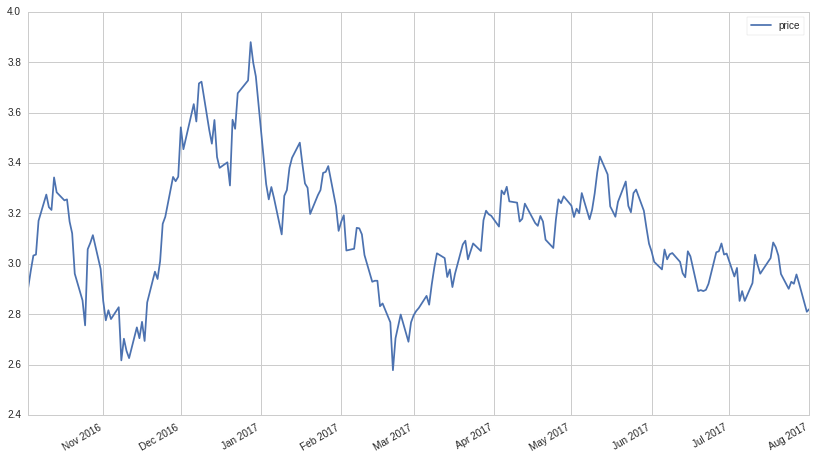

In [45]:
ng_unadjusted_history.plot()

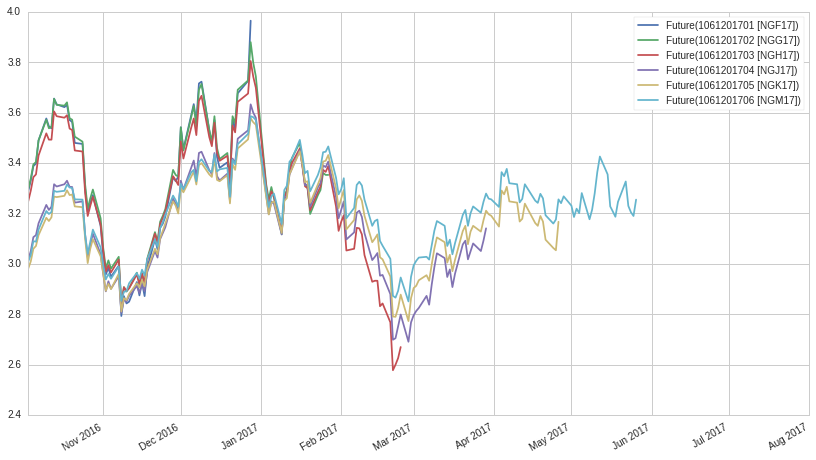

In [46]:
ng_consecutive_contract_price.plot()

In [47]:
pivot_unadj = ng_unadjusted_history.pivot(index=ng_unadjusted_history.index,columns='contract')

In [48]:
pivot_unadj.head()

price  \
contract                  Future(1061201611 [NGX16])   
2016-10-03 00:00:00+00:00                      2.906   
2016-10-04 00:00:00+00:00                      2.973   
2016-10-05 00:00:00+00:00                      3.033   
2016-10-06 00:00:00+00:00                      3.037   
2016-10-07 00:00:00+00:00                      3.171   

                                                      \
contract                  Future(1061201612 [NGZ16])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201701 [NGF17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201702 [NGG17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201703 [NGH17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201704 [NGJ17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201705 [NGK17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201706 [NGM17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201707 [NGN17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201708 [NGQ17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      
contract                  Future(1061201709 [NGU17])  
2016-10

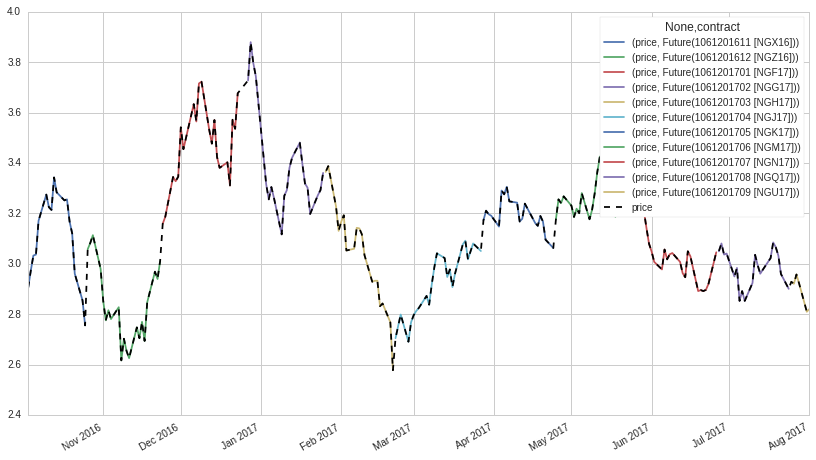

In [49]:
ax = pivot_unadj.plot()
ng_unadjusted_history.plot(ax=ax,ls='--',c='black')